In [165]:
import pyrfume
import pandas as pd
from pprint import pprint
from IPython.display import Image
from predicting_odor_from_molecular_structure import *

In [168]:
from predicting_odor_from_molecular_structure import load_and_merge_data

df = load_and_merge_data()
df

,IsomericSMILES,name,Labels
CID,,,
-955348933095,CCCCC=COC(=O)CCCCCCCC,Hexenyl nonanoate,"['green', 'oily', 'fruity', 'waxy', 'herbal']"
-923209957509,CC(=O)OCC1C=CC(C(C)C)CC1,Tetrahydrocuminyl acetate,"['woody', 'spicy', 'fruity', 'herbal']"
-874408321546,CCCCCCCCC(OC(C)=O)C(=O)OC,Methyl acetoxydecanoate,"['peach', 'apricot', 'buttery']"
-873963935677,CCCCC=COC(=O)C(C)CCC,Hexenyl methylvalerate,"['green', 'fruity', 'apple', 'tropical']"
-862841422647,CCCC(S)COCC,Ethoxymethylbutanethiol,['catty']
...,...,...,...
154241350,CCC1CSSSC1(CC)CC,"4,4,5-triethyltrithiane","['green', 'alliaceous', 'savory', 'onion']"
155323379,CC(S)SS,schembl22694105,"['roasted', 'alliaceous', 'savory', 'sulfurous']"
158699780,CCC(C)C(=S)OCC(C)C,O-(2-methylpropyl) 2-methylbutanethioate,"['ripe', 'creamy', 'fruity', 'tropical', 'stra..."


In [167]:
# df['Labels'] = df['Labels'].apply(lambda x: x.split(';') if isinstance(x, str) else [])
# df

,IsomericSMILES,name,Labels
CID,,,
-955348933095,CCCCC=COC(=O)CCCCCCCC,Hexenyl nonanoate,"[['green', 'oily', 'fruity', 'waxy', 'herbal']]"
-923209957509,CC(=O)OCC1C=CC(C(C)C)CC1,Tetrahydrocuminyl acetate,"[['woody', 'spicy', 'fruity', 'herbal']]"
-874408321546,CCCCCCCCC(OC(C)=O)C(=O)OC,Methyl acetoxydecanoate,"[['peach', 'apricot', 'buttery']]"
-873963935677,CCCCC=COC(=O)C(C)CCC,Hexenyl methylvalerate,"[['green', 'fruity', 'apple', 'tropical']]"
-862841422647,CCCC(S)COCC,Ethoxymethylbutanethiol,[['catty']]
...,...,...,...
154241350,CCC1CSSSC1(CC)CC,"4,4,5-triethyltrithiane","[['green', 'alliaceous', 'savory', 'onion']]"
155323379,CC(S)SS,schembl22694105,"[['roasted', 'alliaceous', 'savory', 'sulfurou..."
158699780,CCC(C)C(=S)OCC(C)C,O-(2-methylpropyl) 2-methylbutanethioate,"[['ripe', 'creamy', 'fruity', 'tropical', 'str..."


In [169]:
#unique_labels = df.loc[df['Count'] > 1, 'Label'].tolist()
labels = df.Labels.value_counts()

In [170]:
df['Labels'] = df['Labels'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [171]:
all_labels = [label for sublist in df['Labels'] for label in sublist]
all_labels

['green',
 'oily',
 'fruity',
 'waxy',
 'herbal',
 'woody',
 'spicy',
 'fruity',
 'herbal',
 'peach',
 'apricot',
 'buttery',
 'green',
 'fruity',
 'apple',
 'tropical',
 'catty',
 'milky',
 'fatty',
 'fruity',
 'green',
 'tropical',
 'catty',
 'lemon',
 'sulfurous',
 'sulfurous',
 'meaty',
 'roasted',
 'green',
 'apple',
 'caramellic',
 'green',
 'fruity',
 'tropical',
 'sweet',
 'green',
 'fruity',
 'tropical',
 'roasted',
 'fruity',
 'tropical',
 'catty',
 'black currant',
 'sulfurous',
 'buttery',
 'roasted',
 'tropical',
 'black currant',
 'coffee',
 'sulfurous',
 'apple',
 'ethereal',
 'fruity',
 'sharp',
 'plum',
 'citrus',
 'herbal',
 'sulfurous',
 'meaty',
 'fatty',
 'peach',
 'buttery',
 'meaty',
 'roasted',
 'burnt',
 'fruity',
 'berry',
 'fruity',
 'citrus',
 'sulfurous',
 'meaty',
 'roasted',
 'green',
 'cognac',
 'alcoholic',
 'ethereal',
 'apple',
 'green',
 'fruity',
 'melon',
 'tropical',
 'waxy',
 'phenolic',
 'floral',
 'sweet',
 'spicy',
 'green',
 'tropical',
 'her

In [173]:
labels = df.Labels.value_counts()
labels

Labels
[odorless]                                        56
[fruity]                                          34
[fruity, sweet]                                   19
[gasoline]                                        19
[oily, fatty]                                     17
                                                  ..
[honey, fatty, floral, rose]                       1
[roasted, meaty, sulfurous, phenolic, smoky]       1
[rose, green, fruity, leafy, balsamic, floral]     1
[rose, citrus, fatty, fruity, floral, sweet]       1
[green, fruity, alliaceous, garlic, onion]         1
Name: count, Length: 2678, dtype: int64

In [174]:
all_labels = [label for sublist in df['Labels'] for label in sublist]
unique_labels = sorted(set(all_labels))
print(f"Liczba unikalnych etykiet: {len(unique_labels)}")

Liczba unikalnych etykiet: 113


In [177]:
dfx = label_frequencies(df)
dfx

,Label,Count
0,fruity,1391
1,green,907
2,sweet,825
3,floral,553
4,fatty,407
...,...,...
108,radish,20
109,leathery,20
110,catty,20
111,horseradish,20


In [33]:
from itertools import combinations

label2idx = {label: i for i, label in enumerate(unique_labels)}
n_labels = len(unique_labels)
co_matrix = np.zeros((n_labels, n_labels), dtype=int)

for labels in df['Labels']:
    unique_in_sample = set(labels)
    for i, j in combinations(unique_in_sample, 2):
        idx_i, idx_j = label2idx[i], label2idx[j]
        co_matrix[idx_i, idx_j] += 1
        co_matrix[idx_j, idx_i] += 1  # symetryczna macierz

co_df = pd.DataFrame(co_matrix, index=unique_labels, columns=unique_labels)

In [34]:
co_df

,alcoholic,aldehydic,alliaceous,almond,animal,anisic,apple,apricot,aromatic,balsamic,...,tobacco,tomato,tropical,vanilla,vegetable,violet,warm,waxy,winey,woody
alcoholic,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,11,0,0,0,9,0
aldehydic,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,4,1,3
alliaceous,0,0,0,0,0,0,0,0,0,0,...,0,1,7,0,16,0,0,0,0,0
almond,0,0,0,0,0,3,0,0,5,5,...,0,0,0,3,0,0,0,0,0,1
animal,0,0,0,0,0,0,0,0,2,0,...,6,0,0,1,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
violet,0,0,0,0,0,0,2,0,0,1,...,0,1,0,0,2,0,0,1,1,8
warm,0,0,0,0,1,0,0,0,1,6,...,1,0,0,5,0,0,0,0,2,4
waxy,0,4,0,0,0,0,19,2,0,6,...,1,0,21,0,6,1,0,0,20,3
winey,9,1,0,0,0,2,29,1,0,1,...,0,0,6,0,2,1,2,20,0,1


In [38]:
import networkx as nx
import community as community_louvain  # python-louvain

# Stwórz graf z macierzy współwystępowania
G = nx.from_pandas_adjacency(co_df)

# Wykonaj detekcję społeczności
partition = community_louvain.best_partition(G)

# Mapowanie etykiet na społeczności
label_community = pd.Series(partition)
print(label_community.value_counts())

0    38
2    35
3    32
1     8
Name: count, dtype: int64


In [56]:
partition

{'alcoholic': 0,
 'aldehydic': 0,
 'alliaceous': 2,
 'almond': 3,
 'animal': 3,
 'anisic': 3,
 'apple': 0,
 'apricot': 0,
 'aromatic': 3,
 'balsamic': 3,
 'banana': 0,
 'beefy': 2,
 'berry': 0,
 'black currant': 2,
 'brandy': 0,
 'bread': 2,
 'brothy': 2,
 'burnt': 2,
 'buttery': 1,
 'cabbage': 2,
 'camphoreous': 3,
 'caramellic': 1,
 'catty': 2,
 'chamomile': 0,
 'cheesy': 2,
 'cherry': 3,
 'chicken': 2,
 'chocolate': 2,
 'cinnamon': 3,
 'citrus': 0,
 'cocoa': 2,
 'coconut': 1,
 'coffee': 2,
 'cognac': 0,
 'coumarinic': 3,
 'creamy': 1,
 'cucumber': 0,
 'dairy': 1,
 'dry': 3,
 'earthy': 2,
 'ethereal': 0,
 'fatty': 0,
 'fermented': 0,
 'fishy': 2,
 'floral': 3,
 'fresh': 0,
 'fruity': 0,
 'garlic': 2,
 'gasoline': 0,
 'grape': 0,
 'grapefruit': 2,
 'grassy': 0,
 'green': 0,
 'hay': 3,
 'hazelnut': 2,
 'herbal': 3,
 'honey': 3,
 'horseradish': 2,
 'jasmine': 3,
 'ketonic': 3,
 'leafy': 0,
 'leathery': 3,
 'lemon': 0,
 'malty': 0,
 'meaty': 2,
 'medicinal': 3,
 'melon': 0,
 'metallic': 

In [58]:
df

,IsomericSMILES,name,Labels
CID,,,
-955348933095,CCCCC=COC(=O)CCCCCCCC,Hexenyl nonanoate,"[green, oily, fruity, waxy, herbal]"
-923209957509,CC(=O)OCC1C=CC(C(C)C)CC1,Tetrahydrocuminyl acetate,"[woody, spicy, fruity, herbal]"
-874408321546,CCCCCCCCC(OC(C)=O)C(=O)OC,Methyl acetoxydecanoate,"[peach, apricot, buttery]"
-873963935677,CCCCC=COC(=O)C(C)CCC,Hexenyl methylvalerate,"[green, fruity, apple, tropical]"
-862841422647,CCCC(S)COCC,Ethoxymethylbutanethiol,[catty]
...,...,...,...
154241350,CCC1CSSSC1(CC)CC,"4,4,5-triethyltrithiane","[green, alliaceous, savory, onion]"
155323379,CC(S)SS,schembl22694105,"[roasted, alliaceous, savory, sulfurous]"
158699780,CCC(C)C(=S)OCC(C)C,O-(2-methylpropyl) 2-methylbutanethioate,"[ripe, creamy, fruity, tropical, strawberry, s..."


In [59]:
from rdkit import Chem
from rdkit.Chem import AllChem
from mordred import Calculator, descriptors

# Konwersja SMILES na molekuły RDKit
df['mol'] = df['IsomericSMILES'].apply(Chem.MolFromSmiles)

# Mordred
calc = Calculator(descriptors, ignore_3D=True)
mordred_features = calc.pandas(df['mol'])

# Morgan fingerprints
def morgan_fp(mol, radius=2, nBits=2048):
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)

df['morgan_fp'] = df['mol'].apply(morgan_fp)

# Daylight fingerprints (RDKit)
def daylight_fp(mol):
    return Chem.RDKFingerprint(mol)

df['daylight_fp'] = df['mol'].apply(daylight_fp)

100%|██████████| 3522/3522 [00:30<00:00, 115.85it/s]


In [60]:
df

,IsomericSMILES,name,Labels,mol,morgan_fp,daylight_fp
CID,,,,,,
-955348933095,CCCCC=COC(=O)CCCCCCCC,Hexenyl nonanoate,"[green, oily, fruity, waxy, herbal]",<rdkit.Chem.rdchem.Mol object at 0x000001EA1CB...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
-923209957509,CC(=O)OCC1C=CC(C(C)C)CC1,Tetrahydrocuminyl acetate,"[woody, spicy, fruity, herbal]",<rdkit.Chem.rdchem.Mol object at 0x000001EA1CB...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
-874408321546,CCCCCCCCC(OC(C)=O)C(=O)OC,Methyl acetoxydecanoate,"[peach, apricot, buttery]",<rdkit.Chem.rdchem.Mol object at 0x000001EA1CB...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
-873963935677,CCCCC=COC(=O)C(C)CCC,Hexenyl methylvalerate,"[green, fruity, apple, tropical]",<rdkit.Chem.rdchem.Mol object at 0x000001EA1CB...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
-862841422647,CCCC(S)COCC,Ethoxymethylbutanethiol,[catty],<rdkit.Chem.rdchem.Mol object at 0x000001EA1CB...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
154241350,CCC1CSSSC1(CC)CC,"4,4,5-triethyltrithiane","[green, alliaceous, savory, onion]",<rdkit.Chem.rdchem.Mol object at 0x000001EA1CD...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
155323379,CC(S)SS,schembl22694105,"[roasted, alliaceous, savory, sulfurous]",<rdkit.Chem.rdchem.Mol object at 0x000001EA1CD...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
158699780,CCC(C)C(=S)OCC(C)C,O-(2-methylpropyl) 2-methylbutanethioate,"[ripe, creamy, fruity, tropical, strawberry, s...",<rdkit.Chem.rdchem.Mol object at 0x000001EA1CD...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [62]:
from sklearn.impute import KNNImputer

mordred_features_clean = mordred_features.dropna(axis=1, thresh=int(0.8*len(mordred_features)))
imputer = KNNImputer()
mordred_imputed = imputer.fit_transform(mordred_features_clean)
mordred_imputed

array([[11.4230983 ,  9.92407015,  0.        , ..., 63.        ,
         6.36111111,  4.41666667],
       [10.29661402,  9.11324141,  0.        , ..., 69.        ,
         5.94444444,  3.19444444],
       [11.60143778, 10.95800663,  0.        , ..., 70.        ,
         7.58333333,  4.27777778],
       ...,
       [ 7.4681869 ,  7.74451168,  0.        , ..., 45.        ,
         6.08333333,  2.69444444],
       [10.00888474,  9.01522841,  0.        , ..., 55.        ,
         5.86111111,  3.91666667],
       [ 7.50862701,  7.2488166 ,  0.        , ..., 40.        ,
         5.47222222,  2.66666667]])

In [136]:
mordred_imputed.shape

(3522, 1517)

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=unique_labels)
Y = mlb.fit_transform(df['Labels'])

In [64]:
mlb

MultiLabelBinarizer(classes=['alcoholic', 'aldehydic', 'alliaceous', 'almond',
                             'animal', 'anisic', 'apple', 'apricot', 'aromatic',
                             'balsamic', 'banana', 'beefy', 'berry',
                             'black currant', 'brandy', 'bread', 'brothy',
                             'burnt', 'buttery', 'cabbage', 'camphoreous',
                             'caramellic', 'catty', 'chamomile', 'cheesy',
                             'cherry', 'chicken', 'chocolate', 'cinnamon',
                             'citrus', ...])

In [65]:
Y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [137]:
mlb.classes_

array(['alcoholic', 'aldehydic', 'alliaceous', 'almond', 'animal',
       'anisic', 'apple', 'apricot', 'aromatic', 'balsamic', 'banana',
       'beefy', 'berry', 'black currant', 'brandy', 'bread', 'brothy',
       'burnt', 'buttery', 'cabbage', 'camphoreous', 'caramellic',
       'catty', 'chamomile', 'cheesy', 'cherry', 'chicken', 'chocolate',
       'cinnamon', 'citrus', 'cocoa', 'coconut', 'coffee', 'cognac',
       'coumarinic', 'creamy', 'cucumber', 'dairy', 'dry', 'earthy',
       'ethereal', 'fatty', 'fermented', 'fishy', 'floral', 'fresh',
       'fruity', 'garlic', 'gasoline', 'grape', 'grapefruit', 'grassy',
       'green', 'hay', 'hazelnut', 'herbal', 'honey', 'horseradish',
       'jasmine', 'ketonic', 'leafy', 'leathery', 'lemon', 'malty',
       'meaty', 'medicinal', 'melon', 'metallic', 'milky', 'mint',
       'mushroom', 'musk', 'musty', 'nutty', 'odorless', 'oily', 'onion',
       'orange', 'orris', 'peach', 'pear', 'phenolic', 'pine',
       'pineapple', 'plum', 'po

In [68]:
from skmultilearn.model_selection import iterative_train_test_split

X = mordred_imputed  # lub inne cechy
y = Y

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain

# Binary Relevance (pojedynczy RF na każdą etykietę)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Classifier Chains
chain = ClassifierChain(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), order='random', random_state=42)
chain.fit(X_train, y_train)



# 5 minut trening!!!!!

ClassifierChain(base_estimator=RandomForestClassifier(random_state=42),
                order='random', random_state=42)

In [71]:
from sklearn.metrics import f1_score

y_pred = rf.predict(X_test)
print("Binary Relevance Micro F1:", f1_score(y_test, y_pred, average='micro'))

y_pred_chain = chain.predict(X_test)
print("Classifier Chains Micro F1:", f1_score(y_test, y_pred_chain, average='micro'))

Binary Relevance Micro F1: 0.3640256959314775
Classifier Chains Micro F1: 0.3706070287539936


In [135]:
y_pred_chain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [134]:
y_test

(734, 113)

In [74]:
X_test[0]

array([11.4230983 ,  9.92407015,  0.        , ..., 63.        ,
        6.36111111,  4.41666667])

In [75]:
# Predykcja etykiet na zbiorze testowym (np. dla Classifier Chains)
y_pred = chain.predict(X_test)  # lub rf.predict(X_test) dla Binary Relevance

# Zamień wynik na tablicę numpy (jeśli sparse)
y_pred = y_pred.toarray() if hasattr(y_pred, "toarray") else y_pred

In [76]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
# Załóżmy, że masz indeksy molekuł w X_test_indices (np. z oryginalnego df)
# Jeśli nie, możesz np. wybrać kilka losowych próbek z testu:

import numpy as np

sample_indices = np.random.choice(X_test.shape[0], size=5, replace=False)

for idx in sample_indices:
    true_labels = mlb.inverse_transform(y_test[idx].reshape(1, -1))[0]
    pred_labels = mlb.inverse_transform(y_pred[idx].reshape(1, -1))[0]
    print(f"Molekuła nr {idx}:")
    print(f"  Prawdziwe etykiety: {true_labels}")
    print(f"  Predykowane etykiety: {pred_labels}")
    print("-" * 40)

Molekuła nr 200:
  Prawdziwe etykiety: ('floral', 'fresh', 'fruity', 'jasmine', 'rose')
  Predykowane etykiety: ('floral', 'fruity')
----------------------------------------
Molekuła nr 571:
  Prawdziwe etykiety: ('dairy', 'fruity', 'green', 'milky')
  Predykowane etykiety: ('green',)
----------------------------------------
Molekuła nr 574:
  Prawdziwe etykiety: ('citrus', 'floral', 'fresh', 'fruity', 'green')
  Predykowane etykiety: ('citrus', 'green')
----------------------------------------
Molekuła nr 733:
  Prawdziwe etykiety: ('berry', 'fruity')
  Predykowane etykiety: ('fruity',)
----------------------------------------
Molekuła nr 552:
  Prawdziwe etykiety: ('cheesy', 'fruity', 'ripe', 'sulfurous', 'tropical')
  Predykowane etykiety: ('cheesy', 'sulfurous')
----------------------------------------


In [123]:
mlb.inverse_transform(y_test[idx].reshape(1, -1))[0]

('apple', 'chamomile', 'pungent')

In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score

def sample_metrics(y_true_sample, y_pred_sample):
    f1 = f1_score(y_true_sample, y_pred_sample, average='binary')
    precision = precision_score(y_true_sample, y_pred_sample, average='binary')
    recall = recall_score(y_true_sample, y_pred_sample, average='binary')
    return f1, precision, recall

# Przykład:
f1, prec, rec = sample_metrics(y_test[10], y_pred[10])
print(f"F1: {f1:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}")

F1: 0.75, Precision: 0.75, Recall: 0.75


In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

# y_test: prawdziwe etykiety (binarna macierz)
# y_pred: przewidziane etykiety (binarna macierz)
# label_names: lista nazw etykiet w tej samej kolejności co kolumny w y_test/y_pred

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

c:\Users\mikoo\miniconda3\envs\primo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
f1_score(y_test, y_pred, average='weighted')

0.332504689827438

In [159]:
y_test[0] * mlb.classes_

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', 'fruity', '', '',
       '', '', '', 'green', '', '', 'herbal', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', 'oily', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'waxy', '',
       ''], dtype=object)

In [160]:
y_pred[0].astype(int) * mlb.classes_

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', 'fruity', '', '',
       '', '', '', 'green', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
      dtype=object)

In [148]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [155]:
y_pred.astype(int)* mlb.classes_

array([['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ...,
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', ''],
       ['', '', '', ..., '', '', '']], dtype=object)

In [149]:
y_test.shape, y_pred.shape

((734, 113), (734, 113))

In [163]:
# 10. Ewaluacja per etykieta
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

results = pd.DataFrame({
    'label': mlb.classes_,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
})

c:\Users\mikoo\miniconda3\envs\primo\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [164]:
results

,label,precision,recall,f1_score
0,alcoholic,0.777778,0.411765,0.538462
1,aldehydic,0.000000,0.000000,0.000000
2,alliaceous,1.000000,0.187500,0.315789
3,almond,1.000000,0.100000,0.181818
4,animal,0.000000,0.000000,0.000000
...,...,...,...,...
108,violet,0.600000,0.500000,0.545455
109,warm,0.000000,0.000000,0.000000
110,waxy,0.684211,0.250000,0.366197
111,winey,0.500000,0.142857,0.222222


In [180]:
results.sort_values(by='f1_score')

,label,precision,recall,f1_score
37,dairy,0.000000,0.000000,0.000000
26,chicken,0.000000,0.000000,0.000000
28,cinnamon,0.000000,0.000000,0.000000
99,strawberry,0.000000,0.000000,0.000000
34,coumarinic,0.000000,0.000000,0.000000
...,...,...,...,...
47,garlic,0.750000,0.473684,0.580645
100,sulfurous,0.607843,0.620000,0.613861
36,cucumber,0.666667,0.571429,0.615385
48,gasoline,0.857143,0.600000,0.705882


In [6]:
unique_labels = df.loc[df['Count'] > 1, 'Label'].tolist()
labels = merged_df.Labels.value_counts()

In [16]:
filtered = merged_df.iloc[:,1:3][merged_df['Labels'].apply(lambda x: 'radish' in x)]
filtered

,name,Labels
CID,,
2346,benzyl isothiocyanate,"['radish', 'horseradish', 'vegetable', 'pungent']"
8160,2-butoxyethyl acetate,"['ethereal', 'radish', 'fruity', 'warm', 'pung..."
10966,ethyl isothiocyanate,"['pungent', 'horseradish']"
11002,dibutyl sulfide,"['green', 'garlic', 'onion', 'violet', 'horser..."
11167,methyl isothiocyanate,"['pungent', 'horseradish']"
11613,butyl isothiocyanate,"['radish', 'green', 'cabbage', 'vegetable', 'p..."
11617,diallyl sulfide,"['garlic', 'pungent', 'sweet', 'horseradish']"
13016,benzyl methyl sulfide,"['meaty', 'roasted', 'savory', 'burnt', 'horse..."
15290,cyclohexanethiol,"['meaty', 'garlic', 'onion', 'horseradish', 'v..."


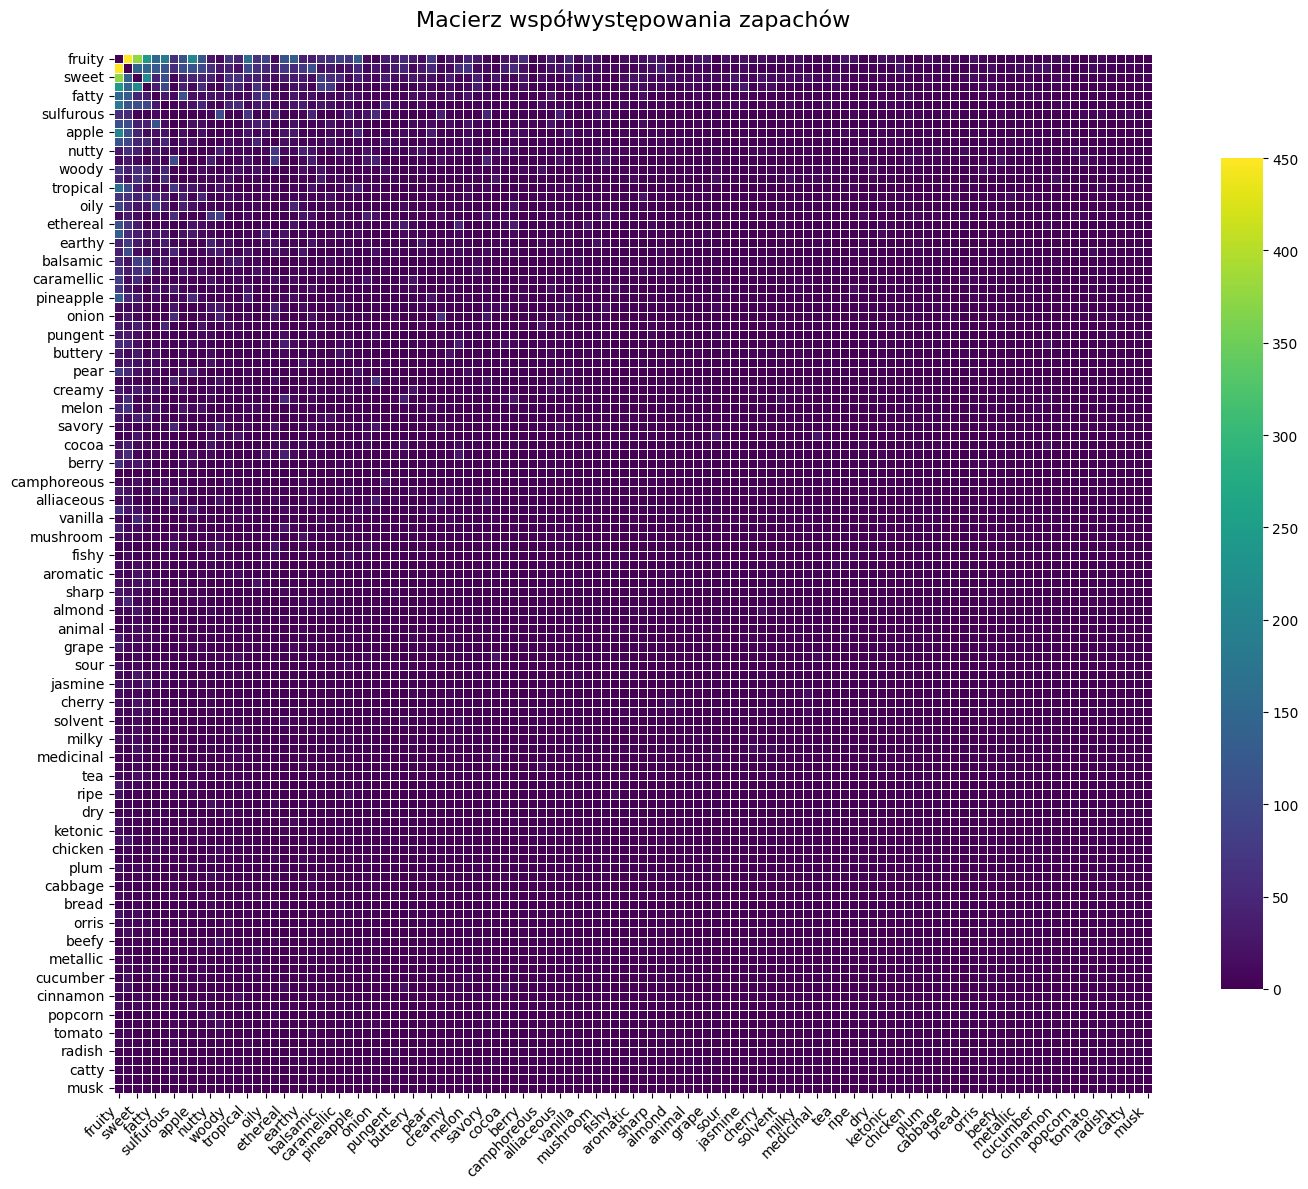

,fruity,green,sweet,floral,fatty,herbal,sulfurous,waxy,apple,fresh,...,chamomile,popcorn,brothy,tomato,black currant,radish,leathery,catty,horseradish,musk
fruity,0,450,375,241,149,183,63,111,207,120,...,18,0,1,6,13,5,0,7,0,4
green,450,0,141,143,127,119,55,102,111,98,...,4,1,2,12,5,5,3,4,4,2
sweet,375,141,0,215,44,106,4,40,45,44,...,10,0,4,0,4,3,2,0,3,7
floral,241,143,215,0,35,97,2,41,12,55,...,5,0,0,0,2,0,1,1,1,2
fatty,149,127,44,35,0,30,13,115,16,14,...,0,0,1,1,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
radish,5,5,3,0,1,0,3,0,0,0,...,0,0,1,0,0,0,0,0,5,0
leathery,0,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
catty,7,4,0,1,0,0,12,0,0,0,...,0,0,1,0,7,0,0,0,0,0
horseradish,0,4,3,1,1,0,2,0,0,0,...,0,0,0,0,0,5,0,0,0,0


In [17]:
# Wywołanie funkcji
from predicting_odor_from_molecular_structure import pco_occurrence_matrix
matrix = pco_occurrence_matrix(merged_df, labels_column='Labels', unique_labels=unique_labels)
matrix

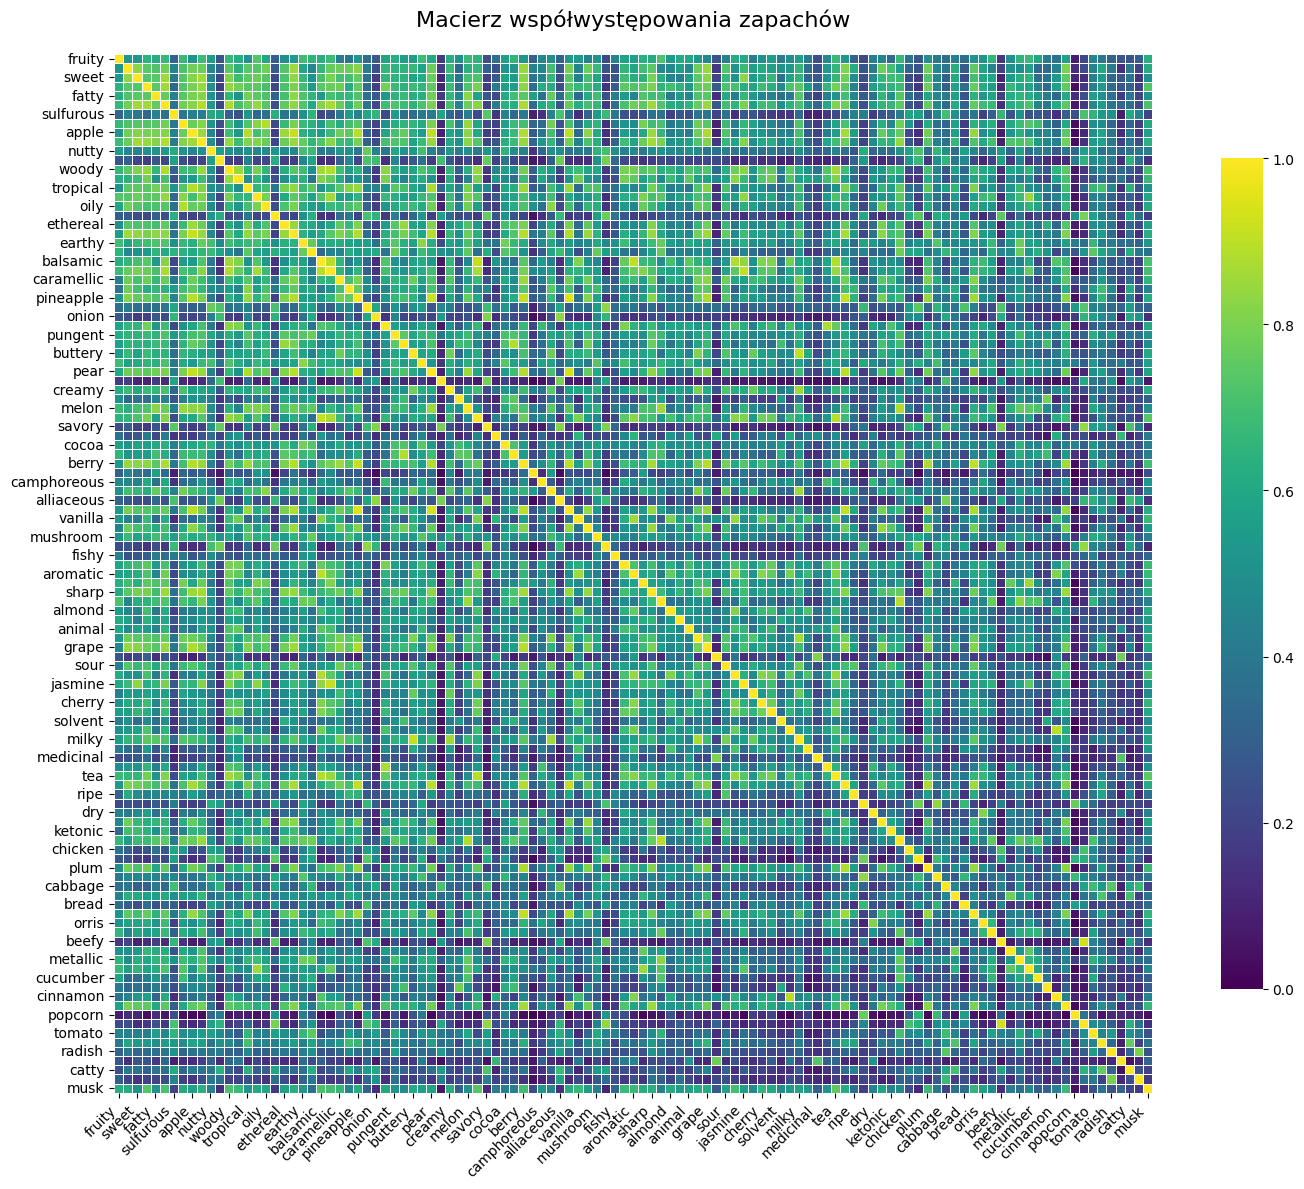

,fruity,green,sweet,floral,fatty,herbal,sulfurous,waxy,apple,fresh,...,chamomile,popcorn,brothy,tomato,black currant,radish,leathery,catty,horseradish,musk
fruity,1.000000,0.520180,0.528126,0.644406,0.621462,0.667745,0.318615,0.669571,0.521981,0.680652,...,0.576439,0.077061,0.218921,0.455133,0.395066,0.315499,0.261574,0.256168,0.293201,0.628277
green,0.520180,1.000000,0.828849,0.738884,0.721436,0.781342,0.446962,0.718044,0.784659,0.772375,...,0.802387,0.125665,0.229582,0.448997,0.597511,0.409382,0.133386,0.409904,0.201186,0.614041
sweet,0.528126,0.828849,1.000000,0.732629,0.738325,0.855842,0.399799,0.731305,0.815925,0.862649,...,0.750472,0.104202,0.130691,0.436068,0.550237,0.328066,0.259301,0.385595,0.152299,0.508623
floral,0.644406,0.738884,0.732629,1.000000,0.738739,0.856635,0.330846,0.726980,0.791341,0.840230,...,0.754414,0.036692,0.162654,0.421082,0.536273,0.347487,0.261202,0.308638,0.190822,0.729489
fatty,0.621462,0.721436,0.738325,0.738739,1.000000,0.765352,0.444936,0.737135,0.793420,0.814683,...,0.604089,0.127730,0.248121,0.555446,0.498905,0.356969,0.170036,0.390338,0.204244,0.514841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
radish,0.315499,0.409382,0.328066,0.347487,0.356969,0.384718,0.507250,0.330772,0.380588,0.396713,...,0.398091,0.120076,0.296705,0.544715,0.335936,1.000000,0.109846,0.323498,0.798300,0.255728
leathery,0.261574,0.133386,0.259301,0.261202,0.170036,0.329827,0.082996,0.139195,0.126065,0.188371,...,0.109210,0.124653,0.123028,0.117714,0.088494,0.109846,1.000000,0.042993,0.113672,0.305877
catty,0.256168,0.409904,0.385595,0.308638,0.390338,0.359994,0.606095,0.329862,0.406784,0.390884,...,0.284869,0.107168,0.641027,0.513671,0.758710,0.323498,0.042993,1.000000,0.240486,0.196541
horseradish,0.293201,0.201186,0.152299,0.190822,0.204244,0.228144,0.444495,0.184196,0.158704,0.232466,...,0.248795,0.091636,0.372659,0.406831,0.189427,0.798300,0.113672,0.240486,1.000000,0.168267


In [18]:

similarity = pco_similarity_matrix(matrix)
similarity

c:\Users\mikoo\miniconda3\envs\primo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



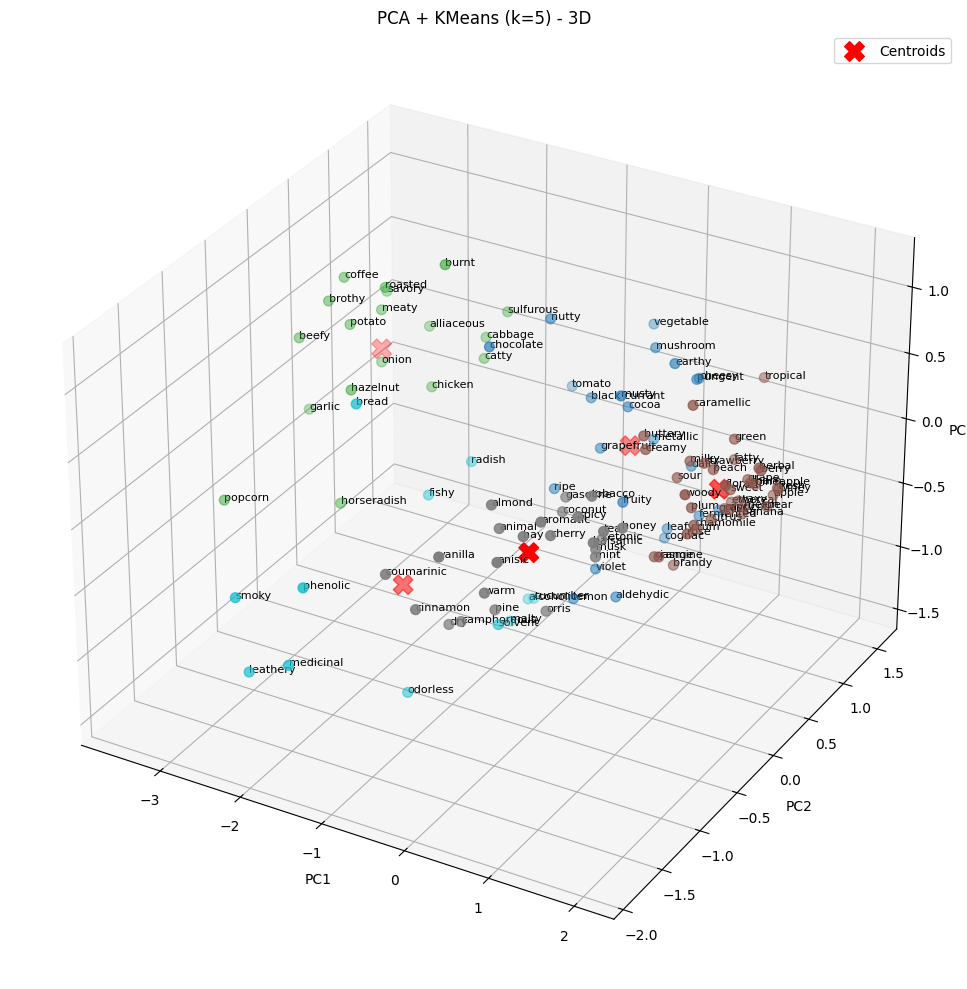

0

In [21]:
from predicting_odor_from_molecular_structure import pca_and_cluster_visualization
pca_and_cluster_visualization(similarity, n_components=3, n_clusters=5) 

In [22]:
from predicting_odor_from_molecular_structure import plotly_pca_kmeans
#plotly_pca_kmeans(similarity, n_components=2, n_clusters=6)
coords, clusters, df_plot = plotly_pca_kmeans(similarity, n_components=2, n_clusters=5)
df_plot

c:\Users\mikoo\miniconda3\envs\primo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,PC1,PC2,cluster,label
0,0.612783,-0.008462,0,fruity
1,1.521332,0.447887,2,green
2,1.636242,0.273173,2,sweet
3,1.887610,-0.093379,2,floral
4,1.164398,0.876461,2,fatty
...,...,...,...,...
108,-1.613050,0.391207,4,radish
109,-2.152071,-1.834686,1,leathery
110,-1.942722,0.902996,4,catty
111,-2.701506,-0.179937,1,horseradish


In [ ]:
!!!!!cluster_dict = df_plot.groupby('cluster')['label'].apply(list).to_dict()

# Przykładowe nazwy klastrów
cluster_names = {
    '0': 'Fruity & Earthy',
    '1': 'Meaty & Roasted',
    '2': 'Fresh & Floral',
    '3': 'Spicy & Aromatic',
    '4': 'Sulfurous & Nutty'
}

# Przykład wyświetlenia nazw i etykiet
for cluster_id, labels in cluster_dict.items():
    print(f"Cluster {cluster_id} - {cluster_names[cluster_id]}:")
    print(", ".join(labels[:10]) + " ...")  # pokazujemy pierwsze 10 etykiet dla skrótu
    print()

Cluster 0 - Fruity & Earthy:
fruity, earthy, vegetable, cheesy, pungent, fermented, musty, cocoa, cognac, dairy ...

Cluster 1 - Meaty & Roasted:
meaty, roasted, onion, garlic, savory, alliaceous, coffee, smoky, hazelnut, chicken ...

Cluster 2 - Fresh & Floral:
green, sweet, floral, fatty, herbal, waxy, apple, fresh, woody, tropical ...

Cluster 3 - Spicy & Aromatic:
spicy, balsamic, mint, honey, phenolic, camphoreous, vanilla, tobacco, aromatic, almond ...

Cluster 4 - Sulfurous & Nutty:
sulfurous, nutty, burnt, alcoholic, odorless, fishy, chocolate, cabbage, bread, cucumber ...



In [23]:
plotly_pca_kmeans(similarity, n_components=3, n_clusters=5)

c:\Users\mikoo\miniconda3\envs\primo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



(array([[ 0.61278304, -0.00846189, -0.05021149],
        [ 1.52133156,  0.44788673,  0.35475218],
        [ 1.63624238,  0.27317276,  0.08352354],
        [ 1.88760983, -0.09337948,  0.34863199],
        [ 1.164398  ,  0.87646054, -0.08110768],
        [ 2.04817331,  0.16976469,  0.37281912],
        [-1.86383726,  1.13039665,  0.41121212],
        [ 1.30018164,  0.79001862, -0.32939781],
        [ 1.6604521 ,  0.85377521, -0.25275497],
        [ 1.92661156,  0.58705932, -0.01105006],
        [-0.77143465,  0.53200786,  0.8241272 ],
        [-2.9554056 ,  0.61545857,  0.48994539],
        [ 1.74946454, -0.47615486,  0.45360891],
        [ 1.06655309, -1.0925008 ,  0.48928362],
        [ 1.11561459,  1.33443346,  0.3097652 ],
        [ 1.47423704,  0.20649864, -0.13251377],
        [ 1.27618999,  0.6259454 , -0.30780471],
        [-2.8112924 ,  0.5233544 ,  0.72815488],
        [ 1.24711237,  0.75564321, -0.33100643],
        [ 1.85747266,  0.68563899, -0.08894136],
        [ 0.64469948